In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import joblib

DATA_PATH = Path("../data/dataset_estudiantes.csv")
df = pd.read_csv(DATA_PATH)

if 'aprobado' not in df.columns and 'nota_final' in df.columns:
    df['aprobado'] = (df['nota_final'] >= 60).astype(int)

target_reg = 'nota_final'
features = [c for c in df.columns if c not in [target_reg, 'aprobado']]

X = df[features].copy()
y = df[target_reg].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['aprobado']
)

pre = joblib.load(Path("../modelos/preprocesador.pkl"))
X_train_p = pre.transform(X_train)
X_test_p  = pre.transform(X_test)

X_train_p.shape, X_test_p.shape


((800, 17), (200, 17))

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def eval_reg(y_true, y_pred, nombre="Modelo"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"modelo": nombre, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


In [3]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_p, y_train)
pred_lin = lin.predict(X_test_p)

res_lin = eval_reg(y_test, pred_lin, "LinearRegression")
res_lin


{'modelo': 'LinearRegression',
 'MAE': 6.068811032580784,
 'MSE': 54.74087554978887,
 'RMSE': 7.398707694576727,
 'R2': 0.40314427865711144}

In [4]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_p, y_train)
pred_rf = rf.predict(X_test_p)

res_rf = eval_reg(y_test, pred_rf, "RandomForestRegressor")
res_rf


{'modelo': 'RandomForestRegressor',
 'MAE': 6.328273333333341,
 'MSE': 57.57057390000016,
 'RMSE': 7.587527522190622,
 'R2': 0.3722912527777208}

In [5]:
import pandas as pd
pd.DataFrame([res_lin, res_rf]).sort_values("RMSE")


,modelo,MAE,MSE,RMSE,R2
0,LinearRegression,6.068811,54.740876,7.398708,0.403144
1,RandomForestRegressor,6.328273,57.570574,7.587528,0.372291


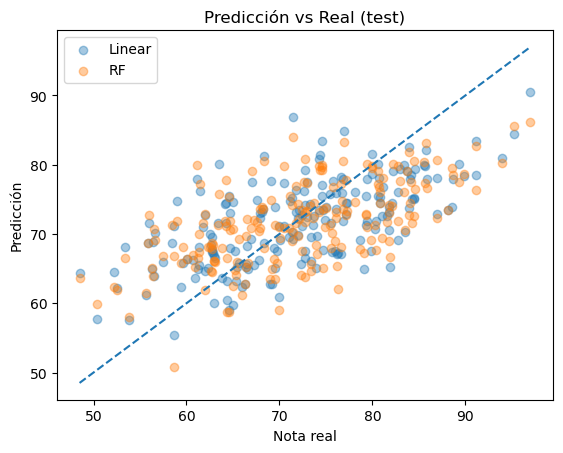

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, pred_lin, alpha=0.4, label="Linear")
plt.scatter(y_test, pred_rf, alpha=0.4, label="RF")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--")
plt.xlabel("Nota real"); plt.ylabel("Predicción")
plt.title("Predicción vs Real (test)")
plt.legend(); plt.show()
